# Text-Based Indicators and App Performance
Paper submitted for the course: Collecting and Analyzing Big Data, at University of Oslo Summer School, 2019.


Sverre S. Ubisch

BI Norwegian Business School

Phone +4746792791

Email: sverre.ubisch@bi.no

# Introduction

The purpose of this project is to investigate whether text-based indicators of product similarity can help explain product performance. This is an active research area in Strategic Management and related disciplines. Text-based measures have gradually started to supplement or replace traditional, static industry classifications in research and typically outperform the latter in terms of explanatory power (see Hoberg & Phillips, 2010; 2016). Similar indicators are now seeing use in the categories or strategic categorization literature (see Zuckerman, 1999 and Hsu, 2006, for early, influential accounts). A recent paper in this field using text analysis is Barlow, Veerhal, and Angus, 2019: "Optimal distinctiveness, strategic categorization, and product market entry on the Google Play app platform" (henceforth BVA). To summarize, this paper shows that, in order to get a large number of downloads, new apps on Google Play must be different from the "average" app while at the same time be similar to high-performing apps. For the purpose of this course paper, I will replicate (with some caveats due to data limitations) and elaborate on the analysis in this study.

The original goal of the project was to hand collect data from company bios in press releases from the Factiva database. However, it appeared that my school's subscription did not include access to this functionality (the conventional user interface only allows for a small number of downloads at a time). Contacting PR Newswire directly proved equally fruitless, as they would not grant access to their API for research purposes (they were not interested in letting me download historical, and thus largely worthless, press releases).

Given time constraints, collecting my own data for this project unfortunately proved too complicated. I will therefore skip the data collection part and focus more on pandas programming (I was completely new to Python before this course) and analysis. Instead of collecting my own data, I will borrow a dataset from Kaggle, https://www.kaggle.com/tristan581/17k-apple-app-store-strategy-games, containing information about App Store Strategy Games. In terms of useful content, this dataset is among the most comprehensive I could find within reasonable time. It contains data on a fair number of products (N is about 7k after all cleaning and subsetting steps) across features such as textual product descriptions, release date, ratings, and number of user ratings etc.

This dataset shares many features with the data in BVA. One important difference is that while their data covers the time period from early 2015 to mid 2016, my data spans over several years from 2009 to 2019, allowing me to go further in exploring the time dimension. However, they have a much larger sample than I, covering all sorts of categories, while I focus on a particular category of games. Importantly, BVA collected their data dynamically. Thus, they have performance data broken down by month, whereas my corresponding data is an accumulated snapshot from the point in time the data was collected (August 2019). However, this may not be as big a problem as it normally would since the main independent variables are based on app text descriptions that generally do not vary over time, precluding conventional panel analysis regardless. I further attempt to mitigate issues stemming from my data structure and limitations in a number of ways that I will detail as I go along.

While I consider it unlikely that I will attempt to write an academic paper based on the analysis of this particular dataset, I take this as an opportunity to familiarize myself with Python programming and text analysis in particularly. My goal is apply what I develop and learn here on a more interesting and comprehensive dataset in the future.

# Theoretical background and research question

Here, I will briefly explain the main theoretical concepts as well as the broad research goal of this paper. This is not by any stretch intended to be an inclusive review of the relevant literature.

The concept of Optimal distinctiveness originated in social psychology in relation to how individuals develop a unique identity while facing considerable pressures of conformity (Brewer, 1991). Similar to individuals, we can also imagine firms having identities and struggling to find the appropriate balance between novelty and legitimacy (Deephouse, 1999). In this literature, it is well documented that a firm's identity, as it is perceived by relevant audiences, will affect performance outcomes, where ambiguous identities typically lead to ignorance or penalty in the marketplace. Thus, to some extent, organizations need to conform to established norms and boundaries associated with their category. At the same time, too high a degree of conformity pose the risk of making the organization, and its offerings, appear less distinct and for practical purposes disappear in the crowded marketplace. Somewhat peculiarly, in this stream of literature, it is quite common that the empirical analysis actually deals with product offerings, presumably treating these more or less as representations of the organizations in question, while the theoretical side is more focused on the organizational level.

Optimal distinctiveness can be conceptualized across many dimensions. In BVA, they focus on two: Prototype and exemplar similarity. Prototype similarity builds on earlier work in cognitive psychology (Rorsch & Lloyd, 1978) and refers to the extent that an entity shares features with a typical representative of a certain group or category. Exemplars, on the other hand, would be entities that, while conforming to a given category, clearly stand out in terms of performance or renown.

BVA hypothesize that offerings with higher levels of prototype similarity basically will be "lost in the crowd", while higher levels of exemplar similarity will result in favorable attention from consumers. Moreover they expect a negative interaction between the two, so that higher levels of prototype similarity will diminish the positive effect of exemplar similarity.

One limitation of BVA however, is the relatively short timespan of observation. Currently in this stream of research, there is little consideration of the temporal dimension (Zhao, Fisher, Lounsbury, & Miller, 2017), which is what I therefore intend to explore. BVA also focus on the number of downloads (proxied by the number of user ratings) as their outcome variable, while other performance measures might be considered. The saliency of prototype and exemplar similarity may vary over time depending on the degree of crowding in the marketplace. In less crowded markets, for instance, the penalty associated with prototype similarty may be less severe. Second, the number of users is but dimension of performance. While a large number of downloads may be regarded as beneficial by most producers, it is unlikely to be the ultimate goal for all. Some product are likely to be intended for more niche audiences rather than maximizing units sold in to the mainstream audience. Therefore, the total number of downloads may matter less relative to having an active user base for a longer period of time. Indeed, several streams of research in strategy and organizational studies suggest a tradeoff between short term profits and long term survival (see Cattani, Porac, & Thomas, 2017, for a review). Thus, in addition to replicating the analysis in BVA, I will also replace the outcome variable with an alternative performance indicator of survival, and investigate whether prototype and exemplar similarity also may predict performance along this dimension.

# Initial data exploration and cleaning

In [1]:
import pandas as pd

In [2]:
# Read the data
df = pd.read_csv('appstore_games.csv')
df

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
5,https://apps.apple.com/us/app/sudoku-classic-n...,286210009,Sudoku - Classic number puzzle,Original brain training,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,47.0,0.00,1.99,"Sudoku will tease your brain, challenge you or...",OutOfTheBit Ltd,4+,EN,48672768.0,Games,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019
6,https://apps.apple.com/us/app/gravitation/id28...,286313771,Gravitation,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,35.0,0.00,NaN,"""Gravitation is a new implementation of the pu...",Robert Farnum,4+,NaN,6328320.0,Games,"Games, Entertainment, Puzzle, Strategy",30/07/2008,14/11/2013
7,https://apps.apple.com/us/app/colony/id286363959,286363959,Colony,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,125.0,0.99,NaN,"""50 levels of addictive puzzling strategy fun!...",Chris Haynes,4+,EN,64333824.0,Games,"Games, Strategy, Board",3/08/2008,3/10/2018
8,https://apps.apple.com/us/app/carte/id286566987,286566987,Carte,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,2.5,44.0,0.00,NaN,"""Jeu simple qui consiste \xe0 trouver comment ...",Jean-Francois Pautex,4+,FR,2657280.0,Games,"Games, Strategy, Board, Entertainment",3/08/2008,23/11/2017
9,https://apps.apple.com/us/app/barrels-o-fun/id...,286682679,"""Barrels O' Fun""",NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,2.5,184.0,0.00,NaN,Barrels O\u2019 Fun is a simple but challengin...,BesqWare,4+,EN,1466515.0,Games,"Games, Casual, Strategy",1/08/2008,1/08/2008


One concern is that the product descriptions are too short to be informative. To investigate, I make a new variable counting the number of characters in this string.

In [3]:
# Count number of characters in app description
df['desc_len'] = df['Description'].str.len()

Then explore the data a bit.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 19 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

In [5]:
df.keys()

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date',
       'desc_len'],
      dtype='object')

In [6]:
df.describe()

,ID,Average User Rating,User Rating Count,Price,Size,desc_len
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04,17007.000000
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08,1049.854119
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08,913.477716
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04,6.000000
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07,404.000000
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07,795.000000
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08,1417.000000
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09,12925.000000


As we can see above, the mean number of characters in the descriptions is about 1k. In BVA the corresponding number is about 500. Thus, I expect the product descriptions in my sample to be sufficient to measure product distinctiveness.

Next, I check for duplicate rows in the data, as this is quite common in data from Kaggle and similar sources.

In [7]:
# Count duplicate rows
duplicateRowsDF = df[df.duplicated()]
 
len(duplicateRowsDF)

160

There are 160 duplicate rows. Remove these.

In [8]:
# Remove duplicate rows
df = df.drop_duplicates()

In [9]:
duplicateRowsDF = df[df.duplicated()]

# Check again
len(duplicateRowsDF)

0

# Time Dynamics

The products in the data frame have a release date. Thus, it is possible to track the evolution of this product segment over time. Since we have data running over several years, individual dates is a bit too granularity much in terms of breaking this down. Instead, it may be more useful to work with a year-month format, i.e. treating all apps released in the same month as released at the same time and facing the same competitive environment.

In [10]:
import datetime

In [11]:
# Convert original release date to datetime object
df['rel_date'] = pd.to_datetime(df['Original Release Date'], format = '%d/%m/%Y', infer_datetime_format=True,
                                                        errors='coerce')

C:\BI-Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
# Convert current release date to datetime object
df['current_rel_date'] = pd.to_datetime(df['Current Version Release Date'], format = '%d/%m/%Y', infer_datetime_format=True,
                                                        errors='coerce')

C:\BI-Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# Inspect
df.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,...,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,desc_len,rel_date,current_rel_date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",...,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017,1617,2008-07-11,2017-05-30
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",...,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018,1222,2008-07-11,2018-05-17
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,...,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017,582,2008-07-11,2017-09-05
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",...,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017,1675,2008-07-23,2017-05-30
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",...,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018,2076,2008-07-18,2018-07-22


Now that python understands that those objects are dates, we can compute the difference between the two. This is going to be my main outcome variable in the analysis. The number of days between the original and current version may indicate to what extent the app is "alive". There is probably very little, if any cost associated with letting a more or less defunct app remain on the platform, while apps with an active customer base are likely to get updates. Of course, it is possible that an app may be in use, and get more downloads, even if it it was not updated recently. I assume that is generally less likely.

In [14]:
# Compute number of days from original release to current version release
df['days_maintained'] = (df['current_rel_date'] - df['rel_date'])

C:\BI-Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
type('days_maintained')


str

In [16]:
df['days_maintained'] = df['days_maintained'].dt.days


C:\BI-Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
print(df['days_maintained'])

0        3245
1        3597
2        3343
3        3233
4        3656
5        3925
6        1933
7        3713
8        3399
9           0
10         50
11         96
12        337
13       3902
14         55
15       2409
17        400
18       1527
19       3866
20       2959
21       3825
22       3084
23       3737
24       3147
25          0
26       3475
27       3760
28       3874
29       2953
30       3143
         ... 
16977       0
16978       0
16979       0
16980       0
16981       0
16982       0
16983       0
16984       0
16985       0
16986       0
16987       0
16988       0
16989       0
16990       0
16991       0
16992       0
16993       0
16994       0
16995       0
16996       0
16997       0
16998       0
16999       0
17000       0
17001       0
17002       0
17003       0
17004       0
17005       0
17006       0
Name: days_maintained, Length: 16847, dtype: int64


In [18]:
%matplotlib inline

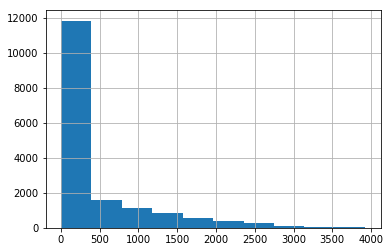

In [19]:
# Histogram of number of days the app was maintained
df['days_maintained'].hist()

As expected, this variable is extremely skewed with many apps not getting updated versions and other apps having years between their initial and current version release dates. This distribution will generally not work well in OLS regression, thus I log-transform it.

In [20]:
import numpy as np

In [21]:
# Compute log of days
df['ln_days'] = np.log(1 + df['days_maintained'])

C:\BI-Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


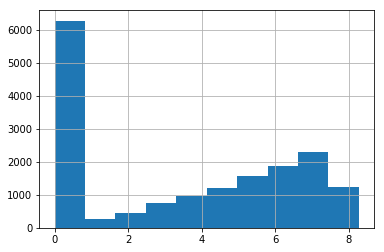

In [22]:
# Plot of the logged variable
df['ln_days'].hist()

This distribution is somewhat more appropriate.

Inspecting variables above indicates that the variable 'User Rating Count' has a large proportion of missing values. This is a very important variable since it will proxy as number of downloads. The log-transformed number of user ratings is the dependent variable in BVA. Typically, in online marketplaces, the number of user ratings is very highly correlated with the number of downloads or purchases (I have seen this regularity in several datasets).

In [23]:
# Replace NaN with zero
df['rating_count'] = df['User Rating Count'].fillna(0)

C:\BI-Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
# Compute log
df['ln_rating_count'] = np.log(1 + df['rating_count'])

C:\BI-Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


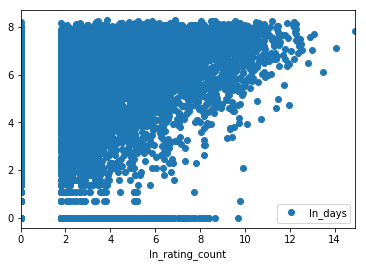

In [25]:
# Plot rating count and number of days
df.plot(x='ln_rating_count', y='ln_days', style='o')

In [26]:
# Compute correlation
from scipy.stats import pearsonr

pearsonr(df['ln_rating_count'], df['ln_days'])

(0.4939281930351983, 0.0)

As we can see from the plot and numbers above, the rating count and number of days between original and current release are highly correlated. Since I do not have time-varying data for these variables, it is impossible to completely disentangle the two in terms of causal direction. In fact, they are probably generated reciprocally, i.e. active users downloading and scoring apps lead developers to release updated versions, in turn leading more users to download and score apps.

In [27]:
# Convert dates to year-months for original release date
df['rel_t'] = pd.to_datetime(df['rel_date']).dt.to_period('m')
print(df['rel_t'])

0        2008-07
1        2008-07
2        2008-07
3        2008-07
4        2008-07
5        2008-07
6        2008-07
7        2008-08
8        2008-08
9        2008-08
10       2008-08
11       2008-08
12       2008-08
13       2008-08
14       2008-08
15       2008-08
17       2008-09
18       2009-02
19       2008-09
20       2008-09
21       2008-09
22       2008-09
23       2008-09
24       2008-10
25       2008-10
26       2008-10
27       2008-10
28       2008-10
29       2008-11
30       2008-10
          ...   
16977    2019-07
16978    2019-08
16979    2019-08
16980    2019-10
16981    2019-07
16982    2019-08
16983    2019-07
16984    2019-07
16985    2019-07
16986    2019-07
16987    2019-08
16988    2019-07
16989    2019-07
16990    2019-07
16991    2019-08
16992    2019-07
16993    2019-07
16994    2019-07
16995    2019-07
16996    2019-08
16997    2019-07
16998    2019-07
16999    2019-07
17000    2019-08
17001    2019-08
17002    2019-07
17003    2019-08
17004    2019-

C:\BI-Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
# Convert dates to year-months for current release date
df['current_rel_t'] = pd.to_datetime(df['current_rel_date']).dt.to_period('m')
print(df['current_rel_t'])

0        2017-05
1        2018-05
2        2017-09
3        2017-05
4        2018-07
5        2019-04
6        2013-11
7        2018-10
8        2017-11
9        2008-08
10       2008-09
11       2008-11
12       2009-07
13       2019-05
14       2008-10
15       2015-04
17       2009-10
18       2013-04
19       2019-04
20       2016-10
21       2019-03
22       2017-03
23       2018-12
24       2017-05
25       2008-10
26       2018-04
27       2019-01
28       2019-05
29       2016-12
30       2017-05
          ...   
16977    2019-07
16978    2019-08
16979    2019-08
16980    2019-10
16981    2019-07
16982    2019-08
16983    2019-07
16984    2019-07
16985    2019-07
16986    2019-07
16987    2019-08
16988    2019-07
16989    2019-07
16990    2019-07
16991    2019-08
16992    2019-07
16993    2019-07
16994    2019-07
16995    2019-07
16996    2019-08
16997    2019-07
16998    2019-07
16999    2019-07
17000    2019-08
17001    2019-08
17002    2019-07
17003    2019-08
17004    2019-

C:\BI-Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
# Convert release date to release year
df['rel_year'] = pd.to_datetime(df['rel_date']).dt.to_period('y')
print(df['rel_year'])

0        2008
1        2008
2        2008
3        2008
4        2008
5        2008
6        2008
7        2008
8        2008
9        2008
10       2008
11       2008
12       2008
13       2008
14       2008
15       2008
17       2008
18       2009
19       2008
20       2008
21       2008
22       2008
23       2008
24       2008
25       2008
26       2008
27       2008
28       2008
29       2008
30       2008
         ... 
16977    2019
16978    2019
16979    2019
16980    2019
16981    2019
16982    2019
16983    2019
16984    2019
16985    2019
16986    2019
16987    2019
16988    2019
16989    2019
16990    2019
16991    2019
16992    2019
16993    2019
16994    2019
16995    2019
16996    2019
16997    2019
16998    2019
16999    2019
17000    2019
17001    2019
17002    2019
17003    2019
17004    2019
17005    2019
17006    2019
Name: rel_year, Length: 16847, dtype: period[A-DEC]


C:\BI-Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
type('rel_year')

str

As mentioned, the data I am using was collected August, 2019. The ceiling on app survival becomes lower the closer to this point in time we get. Thus, gradually there will be less variation in app survival as the release date approaches August, 2019. To mitigate this truncation bias, I elect to drop all apps released after 2015. This gives apps in the sample at least 3.5 years to unfold in terms of survival variation.

In [31]:
# Drop apps released after 2015
upto2015 =  df['rel_year']<2016
print(upto2015.head())

0    True
1    True
2    True
3    True
4    True
Name: rel_year, dtype: bool


In [32]:
df = df[upto2015]
df.describe()

,ID,Average User Rating,User Rating Count,Price,Size,desc_len,days_maintained,ln_days,rating_count,ln_rating_count
count,6.919000e+03,4123.000000,4.123000e+03,6919.000000,6.919000e+03,6919.000000,6919.000000,6919.000000,6.919000e+03,6919.000000
mean,7.719095e+08,3.955372,3.749475e+03,0.538988,8.087946e+07,1105.461194,807.261598,4.738215,2.234295e+03,2.728540
std,2.206703e+08,0.742141,5.070487e+04,2.530452,1.666974e+08,895.804945,881.620824,3.054391,3.918256e+04,2.873408
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04,6.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,5.786504e+08,3.500000,1.400000e+01,0.000000,1.718477e+07,483.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,8.463289e+08,4.000000,5.300000e+01,0.000000,3.548365e+07,895.000000,490.000000,6.196444,9.000000e+00,2.302585
75%,9.617644e+08,4.500000,4.065000e+02,0.000000,8.044851e+07,1455.500000,1414.000000,7.254885,9.250000e+01,4.537947
max,1.069360e+09,5.000000,3.032734e+06,139.990000,3.747743e+09,12143.000000,3925.000000,8.275376,3.032734e+06,14.924975


In [33]:
# Inspect new df
df['rel_year'].describe()

count     6919
unique       8
top       2015
freq      2190
Name: rel_year, dtype: object

In [34]:
%matplotlib inline
%pip install pdtext --upgrade


import pandas as pd
import seaborn as sns

Requirement already up-to-date: pdtext in c:\bi-apps\anaconda3\lib\site-packages (0.2.0)
Note: you may need to restart the kernel to use updated packages.


In [35]:
from pdtext.tf import word_count

In [36]:
# Count words in app descriptions
df['word_count'] = df['Description'].apply(word_count)

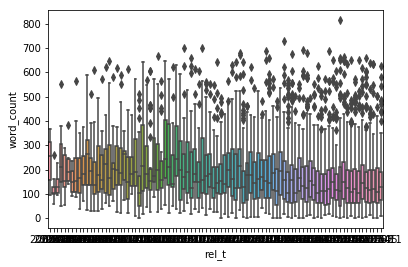

In [37]:
# Boxplot of word count in app descriptions
sns.boxplot(x = "rel_t", 
            y = "word_count",
            data =df)

The plot above suggests that word count over time is declining on average, while variation is increasing.

# Text Cleaning

In [38]:
# Convert text strings to lower case
df['desc'] = df['Description'].str.lower()
df['desc'].head()

0    join over 21,000,000 of our fans and download ...
1    the classic game of reversi, also known as oth...
2    play the classic strategy game othello (also k...
3    top 100 free app for over a year.\nrated "best...
4    "senet deluxe - the ancient game of life and a...
Name: desc, dtype: object

Remove stop words.

In [39]:
from nltk.corpus import stopwords


In [40]:
import nltk

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\BI-
[nltk_data]     Apps\Anaconda3\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
stop_words = stopwords.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [43]:
df['without_stopwords'] = df['desc'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['without_stopwords'].head()

0    join 21,000,000 fans download one sudoku games...
1    classic game reversi, also known othello, much...
2    play classic strategy game othello (also known...
3    top 100 free app year.\nrated "best sudoku gam...
4    "senet deluxe - ancient game life afterlife\n\...
Name: without_stopwords, dtype: object

In [44]:
display(df['without_stopwords'])

0       join 21,000,000 fans download one sudoku games...
1       classic game reversi, also known othello, much...
2       play classic strategy game othello (also known...
3       top 100 free app year.\nrated "best sudoku gam...
4       "senet deluxe - ancient game life afterlife\n\...
5       sudoku tease brain, challenge allow unwind rel...
6       "gravitation new implementation puzzle strateg...
7       "50 levels addictive puzzling strategy fun! pl...
8       "jeu simple qui consiste \xe0 trouver comment ...
9       barrels o\u2019 fun simple challenging solitai...
10      quaddraxx-logic \u2013 challenge brain!\n\ndis...
11      "the objective lumen light checkpoints puzzle ...
12      ready popping? pop can\u2019t stop! fast paced...
13      awarded "best puzzler" macworld\'s "the best g...
14      play classic edge matching puzzle game tetrave...
15      awele/oware oldest african board game still wi...
17      "how nice game chess?" -- joshua, wargames\n\n...
18      *more 

Some strings appear to be non-English. These will not be comparable to English descriptions in terms of measuring similarity, thus I will remove these.

In [45]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [46]:
from langdetect import detect

In [47]:
# Identify language
df['lang'] = df['without_stopwords'].apply(detect)
df['lang'].head()

0    en
1    en
2    en
3    en
4    en
Name: lang, dtype: object

In [48]:
# Keep only English app descriptions
is_en = df['lang']=='en'

In [49]:
df = df[is_en]
display(df['without_stopwords'])

0       join 21,000,000 fans download one sudoku games...
1       classic game reversi, also known othello, much...
2       play classic strategy game othello (also known...
3       top 100 free app year.\nrated "best sudoku gam...
4       "senet deluxe - ancient game life afterlife\n\...
5       sudoku tease brain, challenge allow unwind rel...
6       "gravitation new implementation puzzle strateg...
7       "50 levels addictive puzzling strategy fun! pl...
9       barrels o\u2019 fun simple challenging solitai...
10      quaddraxx-logic \u2013 challenge brain!\n\ndis...
11      "the objective lumen light checkpoints puzzle ...
12      ready popping? pop can\u2019t stop! fast paced...
13      awarded "best puzzler" macworld\'s "the best g...
14      play classic edge matching puzzle game tetrave...
15      awele/oware oldest african board game still wi...
17      "how nice game chess?" -- joshua, wargames\n\n...
18      *more 4 million downloads!!!\n\n#1 iphone free...
19      play s

Word stemming/lemmatizing. Ideally, I would have wanted to stem words in text descriptions before computing the similarity indicators since BVA also does this. In doing so, I ran into this error https://stackoverflow.com/questions/38984387/drive-issue-with-python-nltk

After several attempts, I was still unable to resolve this. Thus, words remain unstemmed. This probably leads to a slight underestimation of similarity measures, though the effect is likely to be similar accross the observations, and thus will not result in bias with respect. However, coefficients for similarity indicators may be slightly downward biased as a result of this.

In [50]:
#import nltk

#w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
#lemmatizer = nltk.stem.WordNetLemmatizer()

#def lemmatize_text(text):
#    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

#df = pd.DataFrame(['this was cheesy', 'she likes these books', 'wow this is great'], columns=['text'])
#df['text_lemmatized'] = df.text.apply(lemmatize_text)

In [51]:
##from nltk import word_tokenize
##from nltk.stem import PorterStemmer

In [52]:
##pst = PorterStemmer()

In [53]:
##df['without_stopwords'] = df['without_stopwords'].apply(word_tokenize)

In [54]:
##df['without_stopwords'] = df['without_stopwords'].apply(lambda x: ' '.join([pst.stem(y) for y in x]))
##df['without_stopwords'].head()

# Indicator computation

After some initial data exploration and cleaning, we are now ready to compute our main independant variables, prototype and exemplar similarity.

We start with prototype similarity. I follow BVA and compute the prototype similarity as the number of overlapping words between the focal app's description and the top 50 most frequent words in all app's released in the month prior to the release of the focal app divided by the number of words in the focal app.

In [55]:
# Count top 50 frequency words by each t
df['without_stopwords'].str.split(expand=True).stack().value_counts()[:50]

game           12856
-               4882
play            4236
new             3532
get             2961
\n-             2895
one             2494
different       2251
fun             2183
time            2177
free            2074
games           1990
levels          1961
app             1940
make            1930
use             1925
strategy        1748
players         1595
like            1595
best            1591
unique          1587
world           1576
many            1493
puzzle          1479
friends         1420
help            1391
&               1332
us              1321
level           1311
also            1306
player          1292
battle          1290
take            1284
easy            1275
game.           1272
great           1267
find            1252
3               1217
iphone          1164
move            1158
challenge       1123
challenging     1102
every           1095
simple          1071
keep            1070
way             1064
build           1061
addictive    

In [56]:
# Identify top 50 words at each t, store in array
top50 = df.groupby('rel_t')['without_stopwords'].apply(lambda x: " ".join(x.str.split(expand=True).stack().value_counts()[:50].index))

In [57]:
# Convert to data frame
top50 = pd.DataFrame(top50)
top50.head()

,without_stopwords
rel_t,
2008-07,game sudoku challenge one solving color puzzle...
2008-08,game two difficulty tiles clue tetravex easy *...
2008-09,- play game one puzzles number daily score pie...
2008-10,game sudoku - iphone full one fun \n\u2022 uni...
2008-11,"game chess - play rummy pieces online, games p..."


In [58]:
# Rename column
top50.columns = ['top50']

In [59]:
#Check if index is comprehensive, i.e. no missing periods
top50.index

PeriodIndex(['2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12',
             '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06',
             '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12',
             '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
             '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12',
             '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
             '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
             '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
             '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
             '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
             '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
             '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
             '2014-07', '2014-08', '2014-09', '2014-

In [60]:
# Lag word column by one t
top50l = top50.shift(1)
top50l.head()

,top50
rel_t,
2008-07,NaN
2008-08,game sudoku challenge one solving color puzzle...
2008-09,game two difficulty tiles clue tetravex easy *...
2008-10,- play game one puzzles number daily score pie...
2008-11,game sudoku - iphone full one fun \n\u2022 uni...


In [61]:
# Merge top 50 frequent words by t into core df
df = pd.merge(df, top50l, left_on='rel_t', right_index=True)

In [62]:
df

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,...,rating_count,ln_rating_count,rel_t,current_rel_t,rel_year,word_count,desc,without_stopwords,lang,top50
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",...,3553.0,8.175829,2008-07,2017-05,2008,256,"join over 21,000,000 of our fans and download ...","join 21,000,000 fans download one sudoku games...",en,NaN
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",...,284.0,5.652489,2008-07,2018-05,2008,202,"the classic game of reversi, also known as oth...","classic game reversi, also known othello, much...",en,NaN
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,...,8376.0,9.033245,2008-07,2017-09,2008,97,play the classic strategy game othello (also k...,play classic strategy game othello (also known...,en,NaN
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",...,190394.0,12.156856,2008-07,2017-05,2008,264,"top 100 free app for over a year.\nrated ""best...","top 100 free app year.\nrated ""best sudoku gam...",en,NaN
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",...,28.0,3.367296,2008-07,2018-07,2008,364,"""senet deluxe - the ancient game of life and a...","""senet deluxe - ancient game life afterlife\n\...",en,NaN
5,https://apps.apple.com/us/app/sudoku-classic-n...,286210009,Sudoku - Classic number puzzle,Original brain training,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,47.0,0.00,1.99,"Sudoku will tease your brain, challenge you or...",...,47.0,3.871201,2008-07,2019-04,2008,368,"sudoku will tease your brain, challenge you or...","sudoku tease brain, challenge allow unwind rel...",en,NaN
6,https://apps.apple.com/us/app/gravitation/id28...,286313771,Gravitation,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,35.0,0.00,NaN,"""Gravitation is a new implementation of the pu...",...,35.0,3.583519,2008-07,2013-11,2008,109,"""gravitation is a new implementation of the pu...","""gravitation new implementation puzzle strateg...",en,NaN
7,https://apps.apple.com/us/app/colony/id286363959,286363959,Colony,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,125.0,0.99,NaN,"""50 levels of addictive puzzling strategy fun!...",...,125.0,4.836282,2008-08,2018-10,2008,129,"""50 levels of addictive puzzling strategy fun!...","""50 levels addictive puzzling strategy fun! pl...",en,game sudoku challenge one solving color puzzle...
9,https://apps.apple.com/us/app/barrels-o-fun/id...,286682679,"""Barrels O' Fun""",NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,2.5,184.0,0.00,NaN,Barrels O\u2019 Fun is a simple but challengin...,...,184.0,5.220356,2008-08,2008-08,2008,83,barrels o\u2019 fun is a simple but challengin...,barrels o\u2019 fun simple challenging solitai...,en,game sudoku challenge one solving color puzzle...
10,https://apps.apple.com/us/app/quaddraxx/id2875...,287563734,Quaddraxx,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,Quaddraxx-Logic \u2013 Challenge your brain!\n...,...,0.0,0.000000,2008-08,2008-09,2008,110,quaddraxx-logic \u2013 challenge your brain!\n...,quaddraxx-logic \u2013 challenge brain!\n\ndis...,en,game sudoku challenge one solving color puzzle...


In [63]:
# Remove NaN values in rows t = 2008-07 in top50 words variable (the code in the following cell could not run with these values)
df = df[pd.notnull(df['top50'])]

In [64]:
# Inspect results
df['top50'].head()

7     game sudoku challenge one solving color puzzle...
9     game sudoku challenge one solving color puzzle...
10    game sudoku challenge one solving color puzzle...
11    game sudoku challenge one solving color puzzle...
12    game sudoku challenge one solving color puzzle...
Name: top50, dtype: object

In [65]:
# Identify overlap between focal app's description and top50 words

df['word_overlap'] = df.apply(lambda r: set(r['without_stopwords'].split()) & set(r['top50'].split()), axis=1)
df.head()

C:\BI-Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,...,ln_rating_count,rel_t,current_rel_t,rel_year,word_count,desc,without_stopwords,lang,top50,word_overlap
7,https://apps.apple.com/us/app/colony/id286363959,286363959,Colony,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,125.0,0.99,NaN,"""50 levels of addictive puzzling strategy fun!...",...,4.836282,2008-08,2018-10,2008,129,"""50 levels of addictive puzzling strategy fun!...","""50 levels addictive puzzling strategy fun! pl...",en,game sudoku challenge one solving color puzzle...,"{play, one, game, board, pieces, strategy}"
9,https://apps.apple.com/us/app/barrels-o-fun/id...,286682679,"""Barrels O' Fun""",NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,2.5,184.0,0.00,NaN,Barrels O\u2019 Fun is a simple but challengin...,...,5.220356,2008-08,2008-08,2008,83,barrels o\u2019 fun is a simple but challengin...,barrels o\u2019 fun simple challenging solitai...,en,game sudoku challenge one solving color puzzle...,"{fun, 3, game, board, challenge}"
10,https://apps.apple.com/us/app/quaddraxx/id2875...,287563734,Quaddraxx,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,Quaddraxx-Logic \u2013 Challenge your brain!\n...,...,0.000000,2008-08,2008-09,2008,110,quaddraxx-logic \u2013 challenge your brain!\n...,quaddraxx-logic \u2013 challenge brain!\n\ndis...,en,game sudoku challenge one solving color puzzle...,"{color, different, button, number, game, chall..."
11,https://apps.apple.com/us/app/lumen-lite/id288...,288096268,Lumen Lite,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,5072.0,0.00,NaN,"""The objective of Lumen is to light up all the...",...,8.531688,2008-08,2008-11,2008,101,"""the objective of lumen is to light up all the...","""the objective lumen light checkpoints puzzle ...",en,game sudoku challenge one solving color puzzle...,{puzzle}
12,https://apps.apple.com/us/app/bubblepop/id2886...,288669794,BubblePop,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,3.0,526.0,0.00,NaN,Are you ready for some popping? Once you pop ...,...,6.267201,2008-08,2009-07,2008,104,are you ready for some popping? once you pop ...,ready popping? pop can\u2019t stop! fast paced...,en,game sudoku challenge one solving color puzzle...,"{fun, game}"


In [66]:
# Count number of overlapping words

df['overlap_count'] = df['word_overlap'].str.len()
df['overlap_count'].head()

C:\BI-Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


7     6
9     5
10    6
11    1
12    2
Name: overlap_count, dtype: int64

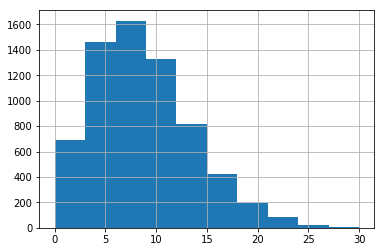

In [67]:
df['overlap_count'].hist()

In [68]:
# Calculate prototype similary
df['protype_sim'] = df['overlap_count'] / df['word_count']
df['protype_sim'].head()

C:\BI-Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


7     0.046512
9     0.060241
10    0.054545
11    0.009901
12    0.019231
Name: protype_sim, dtype: float64

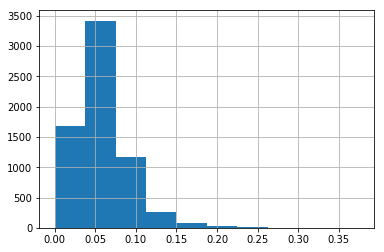

In [69]:
df['protype_sim'].hist()

In [70]:
import numpy as np
np.mean(df['protype_sim'])

0.05895382227033591

The corresponding value in BVA is 0.22, while the mean in my data is much lower. One reason is that descriptions in may data are generally much longer, i.e. the denominator in this ratio is larger.

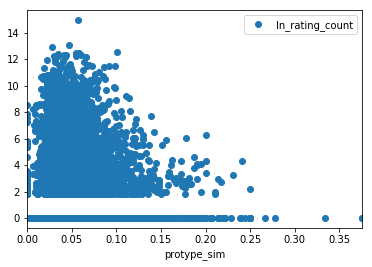

In [71]:
df.plot(x='protype_sim', y='ln_rating_count', style='o')

Looking at the above plot, we can observe a negative relationship between prototype similarity and number of user ratings. Hence, less unique apps are less likely to accumulate a large number of user ratings (or downloads). This is consistent with AVB. 

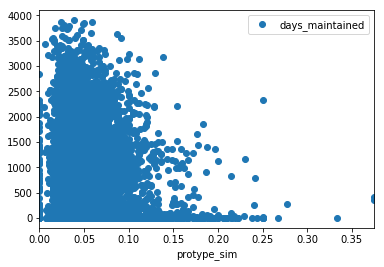

In [72]:
df.plot(x='protype_sim', y='days_maintained', style='o')

In [73]:
from scipy.stats import pearsonr

pearsonr(df['protype_sim'], df['days_maintained'])

(-0.21071868166327462, 9.573389185893059e-68)

We find a strong negative correlation between prototype similarity and number of days an app is maintained. Hence, apps that are less unique tend to stop being maintained sooner.

We move on to compute exemplar similarity. In BVA, the exemplar similarity is computed as the maximum cosine similarity between the focal app and the 100 most downloaded apps released in the previous month. While BVA have millions of app-month observations, my data is much more limited. Therefore, I make some adjustments. First, I use the top 5 apps in terms of the number of user ratings they receive. Second, since I do not have dynamic, i.e. by month, data for number of reviews, I rank within the previous year. Given the theoretical exposition on exemplars, I would argue that it would take some time for the market to determine who are these exemplars. Probably more than one month in most cases. Given both data limitations and theoretical considerations, I use the previous year as the time window rather than the previous month.

In [74]:
# Check number of releases by year
df['rel_year'].value_counts()

2015    2092
2014    1802
2013    1117
2012     703
2011     466
2010     272
2009     172
2008      38
Freq: A-DEC, Name: rel_year, dtype: int64

In [75]:
# Identify apps with the most user ratings each year
top5sort = df.groupby('rel_year')['User Rating Count'].apply(lambda x: x.sort_values(ascending=False)[:5])

In [76]:
top5sort

rel_year      
2008      38       273687.0
          27        72428.0
          26        41869.0
          40         5931.0
          45         5629.0
2009      129      212763.0
          155      199585.0
          105      193923.0
          88       191081.0
          163      148144.0
2010      296      129759.0
          335       51383.0
          261       45686.0
          508       41024.0
          232       37350.0
2011      916      134595.0
          872       90214.0
          663       51485.0
          882       44408.0
          1039      36212.0
2012      1378    3032734.0
          1023     210705.0
          1345     205014.0
          1649      97776.0
          1450      58061.0
2013      1921     469562.0
          2086     219230.0
          2380     114786.0
          2617      70996.0
          2543      63431.0
2014      2410     400787.0
          3550     259030.0
          4528     227214.0
          2675     217469.0
          3595     153052.0
2015 

In [77]:
# Convert to df
pd.DataFrame(top5sort)

User Rating Count
rel_year                        
2008     38             273687.0
         27              72428.0
         26              41869.0
         40               5931.0
         45               5629.0
2009     129            212763.0
         155            199585.0
         105            193923.0
         88             191081.0
         163            148144.0
2010     296            129759.0
         335             51383.0
         261             45686.0
         508             41024.0
         232             37350.0
2011     916            134595.0
         872             90214.0
         663             51485.0
         882             44408.0
         1039            36212.0
2012     1378          3032734.0
         1023           210705.0
         1345           205014.0
         1649            97776.0
         1450            58061.0
2013     1921           469562.0
         2086           219230.0
         2380           114786.0
         2617            70996.0
         2543            63431.0
2014     2410           400787.0
         3550           259030.0
         4528           227214.0
         2675           217469.0
         3595           153052.0
2015     6144           257852.0
         4670           240990.0
         5763           101786.0
         7002            80407.0
         6592            51911.0

In [78]:
# Convert to df with index column for matching to description and year for matching to relevant comparison group
top5sort = top5sort.reset_index(inplace=False)
top5sort.head()

,rel_year,level_1,User Rating Count
0,2008,38,273687.0
1,2008,27,72428.0
2,2008,26,41869.0
3,2008,40,5931.0
4,2008,45,5629.0


In [79]:
# Create small df with descriptions for matching to top5sort
top5descs = pd.DataFrame(df['without_stopwords'])
top5descs.head()

,without_stopwords
7,"""50 levels addictive puzzling strategy fun! pl..."
9,barrels o\u2019 fun simple challenging solitai...
10,quaddraxx-logic \u2013 challenge brain!\n\ndis...
11,"""the objective lumen light checkpoints puzzle ..."
12,ready popping? pop can\u2019t stop! fast paced...


In [80]:
# Merge with descriptions
top5sort = pd.merge(top5sort, top5descs, left_on='level_1', right_index=True)
top5sort.head()

,rel_year,level_1,User Rating Count,without_stopwords
0,2008,38,273687.0,nominated one top free apps top free games bes...
1,2008,27,72428.0,lux game strategy world conquest!\nsimilar boa...
2,2008,26,41869.0,overview\n\nthe invasion begins! pint sized so...
3,2008,40,5931.0,"experience warfare incorporated, critically ac..."
4,2008,45,5629.0,lux dlx epic game strategy & conquest. similar...


In [81]:
# Add one year to match examplars to releases in the following year
top5sort['rel_year'] = top5sort['rel_year'] + 1

In [82]:
top5sort

,rel_year,level_1,User Rating Count,without_stopwords
0,2009,38,273687.0,nominated one top free apps top free games bes...
1,2009,27,72428.0,lux game strategy world conquest!\nsimilar boa...
2,2009,26,41869.0,overview\n\nthe invasion begins! pint sized so...
3,2009,40,5931.0,"experience warfare incorporated, critically ac..."
4,2009,45,5629.0,lux dlx epic game strategy & conquest. similar...
5,2010,129,212763.0,## top 10 paid iphone app 2011 ##\n## also add...
6,2010,155,199585.0,"""the best fantasy football, baseball, basketba..."
7,2010,105,193923.0,"""it\u2019s time relax & refresh sally\u2019s s..."
8,2010,88,191081.0,"""are tired playing chess games look like desig..."
9,2010,163,148144.0,"""cartoon wars arcade war game combines formula..."


In [83]:
# Drop redundant info
top5 = top5sort.drop(['level_1', 'User Rating Count'], axis = 1)
top5.head()

,rel_year,without_stopwords
0,2009,nominated one top free apps top free games bes...
1,2009,lux game strategy world conquest!\nsimilar boa...
2,2009,overview\n\nthe invasion begins! pint sized so...
3,2009,"experience warfare incorporated, critically ac..."
4,2009,lux dlx epic game strategy & conquest. similar...


In [84]:
# Rename column to avoid confusion in matched df
top5.columns = ['rel_year', 'exmplrs']
top5.head()

,rel_year,exmplrs
0,2009,nominated one top free apps top free games bes...
1,2009,lux game strategy world conquest!\nsimilar boa...
2,2009,overview\n\nthe invasion begins! pint sized so...
3,2009,"experience warfare incorporated, critically ac..."
4,2009,lux dlx epic game strategy & conquest. similar...


In [85]:
# Create running count by year to use as column names in wide df
top5['idx'] = top5.groupby('rel_year').cumcount() + 1
top5.head(12)

,rel_year,exmplrs,idx
0,2009,nominated one top free apps top free games bes...,1
1,2009,lux game strategy world conquest!\nsimilar boa...,2
2,2009,overview\n\nthe invasion begins! pint sized so...,3
3,2009,"experience warfare incorporated, critically ac...",4
4,2009,lux dlx epic game strategy & conquest. similar...,5
5,2010,## top 10 paid iphone app 2011 ##\n## also add...,1
6,2010,"""the best fantasy football, baseball, basketba...",2
7,2010,"""it\u2019s time relax & refresh sally\u2019s s...",3
8,2010,"""are tired playing chess games look like desig...",4
9,2010,"""cartoon wars arcade war game combines formula...",5


In [86]:
# Add 'exemplar' running count (and col name in wide df)
top5['idx'] = 'exemplar' + top5['idx'].astype(str)

In [87]:
top5

,rel_year,exmplrs,idx
0,2009,nominated one top free apps top free games bes...,exemplar1
1,2009,lux game strategy world conquest!\nsimilar boa...,exemplar2
2,2009,overview\n\nthe invasion begins! pint sized so...,exemplar3
3,2009,"experience warfare incorporated, critically ac...",exemplar4
4,2009,lux dlx epic game strategy & conquest. similar...,exemplar5
5,2010,## top 10 paid iphone app 2011 ##\n## also add...,exemplar1
6,2010,"""the best fantasy football, baseball, basketba...",exemplar2
7,2010,"""it\u2019s time relax & refresh sally\u2019s s...",exemplar3
8,2010,"""are tired playing chess games look like desig...",exemplar4
9,2010,"""cartoon wars arcade war game combines formula...",exemplar5


In [88]:
# Convert to wide
top5_wide = top5.pivot(index='rel_year', columns= 'idx',  values='exmplrs')
top5_wide.head()

idx,exemplar1,exemplar2,exemplar3,exemplar4,exemplar5
rel_year,,,,,
2009,nominated one top free apps top free games bes...,lux game strategy world conquest!\nsimilar boa...,overview\n\nthe invasion begins! pint sized so...,"experience warfare incorporated, critically ac...",lux dlx epic game strategy & conquest. similar...
2010,## top 10 paid iphone app 2011 ##\n## also add...,"""the best fantasy football, baseball, basketba...","""it\u2019s time relax & refresh sally\u2019s s...","""are tired playing chess games look like desig...","""cartoon wars arcade war game combines formula..."
2011,** farm story\u2122 reached top 1 app store. *...,"bubble explode top 1 free app uk, canada, neth...","""the #1 bracket app back better ever 2019 ncaa...",============updates info=============\n versio...,"omg, read carefully!!!!\n""shoot aliens!..."" - ..."
2012,"""join 16 million players playing gardens time!...","""naval warfare classic strategy board game. us...","""*****#1 free game 26 countries counting \n***...","""the first-ever graphic military game \n\nworl...","""one engaging td games we\'ve played ipad""\n-s..."
2013,"""join millions players worldwide build village...",spider solitaire pairs classic gameplay love c...,"""can infect world? plague inc. unique mix high...","""five-star tower defense unrivaled depth repla...","""knights & dragons non-stop action role-playin..."


In [89]:
# Now merge this set to core df
df = pd.merge(df, top5_wide, left_on='rel_year', right_on='rel_year')
df.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,...,lang,top50,word_overlap,overlap_count,protype_sim,exemplar1,exemplar2,exemplar3,exemplar4,exemplar5
0,https://apps.apple.com/us/app/catcha-mouse/id2...,290493286,Catcha Mouse,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,95971.0,0.00,"1.99, 0.99, 1.99, 0.99, 4.99, 1.99, 1.99",*More than 4 Million downloads!!!\n\n#1 iPhone...,...,en,game play love one levels puzzle free words we...,"{fun, like, iphone, game, -, challenging, easy...",10,0.091743,nominated one top free apps top free games bes...,lux game strategy world conquest!\nsimilar boa...,overview\n\nthe invasion begins! pint sized so...,"experience warfare incorporated, critically ac...",lux dlx epic game strategy & conquest. similar...
1,https://apps.apple.com/us/app/gun-runner-wars/...,301746785,Gun Runner Wars,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,740.0,0.99,NaN,"""Gun Runner is a trading game, inspired by the...",...,en,game play love one levels puzzle free words we...,"{new, high, version, one, game, get}",6,0.028986,nominated one top free apps top free games bes...,lux game strategy world conquest!\nsimilar boa...,overview\n\nthe invasion begins! pint sized so...,"experience warfare incorporated, critically ac...",lux dlx epic game strategy & conquest. similar...
2,https://apps.apple.com/us/app/antivirus/id3023...,302331458,Antivirus,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.0,187.0,0.00,1.99,"""NEW Antivirus V1.2 just released!!! \nAntivir...",...,en,game play love one levels puzzle free words we...,"{fun, like, choose, game, new, high, version, ...",12,0.031830,nominated one top free apps top free games bes...,lux game strategy world conquest!\nsimilar boa...,overview\n\nthe invasion begins! pint sized so...,"experience warfare incorporated, critically ac...",lux dlx epic game strategy & conquest. similar...
3,https://apps.apple.com/us/app/strategery-lite/...,303188552,Strategery Lite,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.5,9121.0,0.00,NaN,"Now you can play Strategery, the award-winning...",...,en,game play love one levels puzzle free words we...,"{fun, iphone, play, challenging, version, app,...",8,0.033058,nominated one top free apps top free games bes...,lux game strategy world conquest!\nsimilar boa...,overview\n\nthe invasion begins! pint sized so...,"experience warfare incorporated, critically ac...",lux dlx epic game strategy & conquest. similar...
4,https://apps.apple.com/us/app/touch-physics-li...,303475501,Touch Physics Lite,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,42210.0,0.00,NaN,Draw shapes with a crayon that come to life on...,...,en,game play love one levels puzzle free words we...,"{fun, iphone, -, game., play, high, levels, ve...",14,0.043344,nominated one top free apps top free games bes...,lux game strategy world conquest!\nsimilar boa...,overview\n\nthe invasion begins! pint sized so...,"experience warfare incorporated, critically ac...",lux dlx epic game strategy & conquest. similar...


In [90]:
# Make new variable with string split into list for focal app's description
df['ws_split'] = df.apply(lambda x: x['without_stopwords'].split(),axis=1)

In [91]:
# As above for exemplars
df['ex1_split'] = df.apply(lambda x: x['exemplar1'].split(),axis=1)
df['ex2_split'] = df.apply(lambda x: x['exemplar2'].split(),axis=1)
df['ex3_split'] = df.apply(lambda x: x['exemplar3'].split(),axis=1)
df['ex4_split'] = df.apply(lambda x: x['exemplar4'].split(),axis=1)
df['ex5_split'] = df.apply(lambda x: x['exemplar5'].split(),axis=1)

In [92]:
df

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,...,exemplar2,exemplar3,exemplar4,exemplar5,ws_split,ex1_split,ex2_split,ex3_split,ex4_split,ex5_split
0,https://apps.apple.com/us/app/catcha-mouse/id2...,290493286,Catcha Mouse,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,95971.0,0.00,"1.99, 0.99, 1.99, 0.99, 4.99, 1.99, 1.99",*More than 4 Million downloads!!!\n\n#1 iPhone...,...,lux game strategy world conquest!\nsimilar boa...,overview\n\nthe invasion begins! pint sized so...,"experience warfare incorporated, critically ac...",lux dlx epic game strategy & conquest. similar...,"[*more, 4, million, downloads!!!\n\n#1, iphone...","[nominated, one, top, free, apps, top, free, g...","[lux, game, strategy, world, conquest!\nsimila...","[overview\n\nthe, invasion, begins!, pint, siz...","[experience, warfare, incorporated,, criticall...","[lux, dlx, epic, game, strategy, &, conquest.,..."
1,https://apps.apple.com/us/app/gun-runner-wars/...,301746785,Gun Runner Wars,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,740.0,0.99,NaN,"""Gun Runner is a trading game, inspired by the...",...,lux game strategy world conquest!\nsimilar boa...,overview\n\nthe invasion begins! pint sized so...,"experience warfare incorporated, critically ac...",lux dlx epic game strategy & conquest. similar...,"[""gun, runner, trading, game,, inspired, tradi...","[nominated, one, top, free, apps, top, free, g...","[lux, game, strategy, world, conquest!\nsimila...","[overview\n\nthe, invasion, begins!, pint, siz...","[experience, warfare, incorporated,, criticall...","[lux, dlx, epic, game, strategy, &, conquest.,..."
2,https://apps.apple.com/us/app/antivirus/id3023...,302331458,Antivirus,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.0,187.0,0.00,1.99,"""NEW Antivirus V1.2 just released!!! \nAntivir...",...,lux game strategy world conquest!\nsimilar boa...,overview\n\nthe invasion begins! pint sized so...,"experience warfare incorporated, critically ac...",lux dlx epic game strategy & conquest. similar...,"[""new, antivirus, v1.2, released!!!, \nantivir...","[nominated, one, top, free, apps, top, free, g...","[lux, game, strategy, world, conquest!\nsimila...","[overview\n\nthe, invasion, begins!, pint, siz...","[experience, warfare, incorporated,, criticall...","[lux, dlx, epic, game, strategy, &, conquest.,..."
3,https://apps.apple.com/us/app/strategery-lite/...,303188552,Strategery Lite,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.5,9121.0,0.00,NaN,"Now you can play Strategery, the award-winning...",...,lux game strategy world conquest!\nsimilar boa...,overview\n\nthe invasion begins! pint sized so...,"experience warfare incorporated, critically ac...",lux dlx epic game strategy & conquest. similar...,"[play, strategery,, award-winning, strategy, g...","[nominated, one, top, free, apps, top, free, g...","[lux, game, strategy, world, conquest!\nsimila...","[overview\n\nthe, invasion, begins!, pint, siz...","[experience, warfare, incorporated,, criticall...","[lux, dlx, epic, game, strategy, &, conquest.,..."
4,https://apps.apple.com/us/app/touch-physics-li...,303475501,Touch Physics Lite,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,42210.0,0.00,NaN,Draw shapes with a crayon that come to life on...,...,lux game strategy world conquest!\nsimilar boa...,overview\n\nthe invasion begins! pint sized so...,"experience warfare incorporated, critically ac...",lux dlx epic game strategy & conquest. similar...,"[draw, shapes, crayon, come, life, iphone, /, ...","[nominated, one, top, free, apps, top, free, g...","[lux, game, strategy, world, conquest!\nsimila...","[overview\n\nthe, invasion, begins!, pint, siz...","[experience, warfare, incorporated,, criticall...","[lux, dlx, epic, game, strategy, &, conquest.,..."
5,https://apps.apple.com/us/app/pocketsports-foo...,303830590,PocketSports Football Lite,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,2.5,20

In [93]:
# Count words in focal app's word list and convert to word frequency array

from collections import Counter

df['ws_count'] = df.apply(lambda x: Counter(x['ws_split']), axis=1)
df['ws_count'].head()

0    {'*more': 1, '4': 1, 'million': 1, 'downloads!...
1    {'"gun': 1, 'runner': 1, 'trading': 3, 'game,'...
2    {'"new': 1, 'antivirus': 4, 'v1.2': 2, 'releas...
3    {'play': 5, 'strategery,': 1, 'award-winning':...
4    {'draw': 1, 'shapes': 2, 'crayon': 2, 'come': ...
Name: ws_count, dtype: object

In [94]:
# As above but for exemplars
df['ex1_count'] = df.apply(lambda x: Counter(x['ex1_split']), axis=1)
df['ex1_count'].head()

0    {'nominated': 1, 'one': 1, 'top': 3, 'free': 3...
1    {'nominated': 1, 'one': 1, 'top': 3, 'free': 3...
2    {'nominated': 1, 'one': 1, 'top': 3, 'free': 3...
3    {'nominated': 1, 'one': 1, 'top': 3, 'free': 3...
4    {'nominated': 1, 'one': 1, 'top': 3, 'free': 3...
Name: ex1_count, dtype: object

In [95]:
df['ex2_count'] = df.apply(lambda x: Counter(x['ex2_split']), axis=1)
df['ex3_count'] = df.apply(lambda x: Counter(x['ex3_split']), axis=1)
df['ex4_count'] = df.apply(lambda x: Counter(x['ex4_split']), axis=1)
df['ex5_count'] = df.apply(lambda x: Counter(x['ex5_split']), axis=1)

In [96]:
# Create function to compute cosine similarity between word frequency object
# Thank you, Stackoverflow: https://stackoverflow.com/questions/55162668/calculate-similarity-between-list-of-words

from collections import Counter
import math

def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

In [97]:
# Apply function to compute cosine similarity
df['cosim1'] = df.apply(lambda x: counter_cosine_similarity(x['ws_count'], x['ex1_count']),axis=1)
df['cosim1'].head()

0    0.105672
1    0.076059
2    0.160535
3    0.237468
4    0.164671
Name: cosim1, dtype: float64

In [98]:
df['cosim2'] = df.apply(lambda x: counter_cosine_similarity(x['ws_count'], x['ex2_count']),axis=1)
df['cosim3'] = df.apply(lambda x: counter_cosine_similarity(x['ws_count'], x['ex3_count']),axis=1)
df['cosim4'] = df.apply(lambda x: counter_cosine_similarity(x['ws_count'], x['ex4_count']),axis=1)
df['cosim5'] = df.apply(lambda x: counter_cosine_similarity(x['ws_count'], x['ex5_count']),axis=1)

In [99]:
df

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,...,ex1_count,ex2_count,ex3_count,ex4_count,ex5_count,cosim1,cosim2,cosim3,cosim4,cosim5
0,https://apps.apple.com/us/app/catcha-mouse/id2...,290493286,Catcha Mouse,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,95971.0,0.00,"1.99, 0.99, 1.99, 0.99, 4.99, 1.99, 1.99",*More than 4 Million downloads!!!\n\n#1 iPhone...,...,"{'nominated': 1, 'one': 1, 'top': 3, 'free': 3...","{'lux': 3, 'game': 5, 'strategy': 1, 'world': ...","{'overview\n\nthe': 1, 'invasion': 1, 'begins!...","{'experience': 1, 'warfare': 2, 'incorporated,...","{'lux': 3, 'dlx': 2, 'epic': 1, 'game': 6, 'st...",0.105672,0.068061,0.093542,0.124003,0.036359
1,https://apps.apple.com/us/app/gun-runner-wars/...,301746785,Gun Runner Wars,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,740.0,0.99,NaN,"""Gun Runner is a trading game, inspired by the...",...,"{'nominated': 1, 'one': 1, 'top': 3, 'free': 3...","{'lux': 3, 'game': 5, 'strategy': 1, 'world': ...","{'overview\n\nthe': 1, 'invasion': 1, 'begins!...","{'experience': 1, 'warfare': 2, 'incorporated,...","{'lux': 3, 'dlx': 2, 'epic': 1, 'game': 6, 'st...",0.076059,0.062985,0.022443,0.052741,0.033647
2,https://apps.apple.com/us/app/antivirus/id3023...,302331458,Antivirus,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.0,187.0,0.00,1.99,"""NEW Antivirus V1.2 just released!!! \nAntivir...",...,"{'nominated': 1, 'one': 1, 'top': 3, 'free': 3...","{'lux': 3, 'game': 5, 'strategy': 1, 'world': ...","{'overview\n\nthe': 1, 'invasion': 1, 'begins!...","{'experience': 1, 'warfare': 2, 'incorporated,...","{'lux': 3, 'dlx': 2, 'epic': 1, 'game': 6, 'st...",0.160535,0.081240,0.064366,0.060948,0.053611
3,https://apps.apple.com/us/app/strategery-lite/...,303188552,Strategery Lite,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.5,9121.0,0.00,NaN,"Now you can play Strategery, the award-winning...",...,"{'nominated': 1, 'one': 1, 'top': 3, 'free': 3...","{'lux': 3, 'game': 5, 'strategy': 1, 'world': ...","{'overview\n\nthe': 1, 'invasion': 1, 'begins!...","{'experience': 1, 'warfare': 2, 'incorporated,...","{'lux': 3, 'dlx': 2, 'epic': 1, 'game': 6, 'st...",0.237468,0.272393,0.202113,0.294144,0.171195
4,https://apps.apple.com/us/app/touch-physics-li...,303475501,Touch Physics Lite,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,42210.0,0.00,NaN,Draw shapes with a crayon that come to life on...,...,"{'nominated': 1, 'one': 1, 'top': 3, 'free': 3...","{'lux': 3, 'game': 5, 'strategy': 1, 'world': ...","{'overview\n\nthe': 1, 'invasion': 1, 'begins!...","{'experience': 1, 'warfare': 2, 'incorporated,...","{'lux': 3, 'dlx': 2, 'epic': 1, 'game': 6, 'st...",0.164671,0.154472,0.250296,0.329917,0.073834
5,https://apps.apple.com/us/app/pocketsports-foo...,303830590,PocketSports Football Lite,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,2.5,20234.0,0.00,NaN,Finally iPhone and iPod touch gets it\'s first...,...,"{'nominated': 1, 'one': 1, 'top': 3, 'free': 3...","{'lux': 3, 'game': 5, 'strategy': 1, 'world': ...","{'overview\n\nthe': 1, 'invasion': 1, 'begins!...","{'experience': 1, 'warfare': 2, 'incorporated,...","{'lux': 3, 'dlx': 2, 'epic': 1, 'game': 6, 'st...",0.106297,0.120496,0.096605,0.089811,0.057474
6,https://apps.apple.com/us/app/ballsnare/id3039...,303954672,BallSnare,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,7.0,0.99,NaN,"""3D version of the classic arcade game: BreakO...",...,"{'nominated': 1, 'one': 1, 'top': 3, 'free': 3...","{'lux': 3, 'game': 5, 'strategy': 1, 'world': ...","{'overview\n\nthe': 1, 'invasion': 1, 'begins!...","{'experience': 1, 'warfare': 2, 'incorporated,...","{'lux': 3, 'dlx': 2, 'epic': 1, 'game': 6, 'st...",0.015749,0.015939,0.010223,0.009240,0.008515
7,https://apps.apple.com/us/app/wordology/id3046...,304657926,Wordology,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.5,125.0,2.99,NaN,Word Game Enthusiasts Unite! Wordolog

In [100]:
# Find exemplar similarity as the maximum cosine similarity between the focal app and the top 5 exemplars
df['exempl_sim'] = df.apply(lambda x: x[['cosim1', 'cosim2','cosim3','cosim4','cosim5']].max(),axis=1)
df['exempl_sim'].head()

0    0.124003
1    0.076059
2    0.160535
3    0.294144
4    0.329917
Name: exempl_sim, dtype: float64

In [101]:
# Inspect correlation between exemplar similarity and survival
pearsonr(df['exempl_sim'], df['days_maintained'])

(0.19729891109991668, 3.992750263476198e-59)

# Controls

In [102]:
# Check type Price
type(df['Price'][0])

numpy.float64

In [103]:
type(df['In-app Purchases'][1])

float

In [104]:
# Create dummy if In-app purchases !=NA (Freemium business models have been shown to adversely affect demand [Rietveld, 2017])
df['buy_in_app'] = df['In-app Purchases'].notnull() * 1

In [105]:
df.describe()

,ID,Average User Rating,User Rating Count,Price,Size,desc_len,days_maintained,ln_days,rating_count,ln_rating_count,word_count,overlap_count,protype_sim,cosim1,cosim2,cosim3,cosim4,cosim5,exempl_sim,buy_in_app
count,6.624000e+03,4006.000000,4.006000e+03,6624.000000,6.624000e+03,6624.000000,6624.000000,6624.000000,6.624000e+03,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000
mean,7.731686e+08,3.962931,3.696086e+03,0.544049,8.157926e+07,1086.418478,799.087409,4.729040,2.235284e+03,2.767555,167.746528,8.235507,0.059026,0.063863,0.067478,0.075782,0.067222,0.061584,0.107870,0.513436
std,2.182540e+08,0.739259,5.115982e+04,2.572728,1.683237e+08,813.380589,869.051267,3.051597,3.982452e+04,2.872483,122.704269,4.849892,0.033095,0.047148,0.047644,0.050945,0.052843,0.044763,0.062780,0.499857
min,2.904933e+08,1.000000,5.000000e+00,0.000000,2.158400e+05,16.000000,0.000000,0.000000,0.000000e+00,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.807491e+08,3.500000,1.400000e+01,0.000000,1.746432e+07,485.000000,0.000000,0.000000,0.000000e+00,0.000000,77.000000,5.000000,0.037337,0.027694,0.035287,0.042075,0.031782,0.030716,0.066137,0.000000
50%,8.466919e+08,4.000000,5.300000e+01,0.000000,3.599104e+07,896.000000,488.000000,6.192362,1.000000e+01,2.397895,140.000000,8.000000,0.052632,0.055744,0.058518,0.067835,0.056659,0.053475,0.096935,1.000000
75%,9.613850e+08,4.500000,4.022500e+02,0.000000,8.106701e+07,1446.000000,1408.000000,7.250636,9.700000e+01,4.584967,222.000000,11.000000,0.073171,0.089615,0.088013,0.098964,0.090318,0.083574,0.136172,1.000000
max,1.069335e+09,5.000000,3.032734e+06,139.990000,3.747743e+09,4663.000000,3753.000000,8.230577,3.032734e+06,14.924975,727.000000,30.000000,0.375000,0.550962,0.527934,0.741051,0.862239,0.813798,0.862239,1.000000


In [106]:
type(df['Average User Rating'][0])

numpy.float64

In [107]:
# Convert release year to factor
df['year'] = df['rel_year'].astype('category')

In [108]:
df['age'] = df['Age Rating'].astype('category')

In [109]:
# Inspect df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6624 entries, 0 to 6623
Data columns (total 62 columns):
URL                             6624 non-null object
ID                              6624 non-null int64
Name                            6624 non-null object
Subtitle                        903 non-null object
Icon URL                        6624 non-null object
Average User Rating             4006 non-null float64
User Rating Count               4006 non-null float64
Price                           6624 non-null float64
In-app Purchases                3401 non-null object
Description                     6624 non-null object
Developer                       6624 non-null object
Age Rating                      6624 non-null object
Languages                       6599 non-null object
Size                            6624 non-null float64
Primary Genre                   6624 non-null object
Genres                          6624 non-null object
Original Release Date           6624 non-nu

From the table above, we can see that the variable 'Average User Rating' has about 2600 missing values, reflecting the large number of apps that were never scored by a user. This variable is an important control as an indication of the general quality of the individual app. To avoid losing a large number of observations, I replace missing with zeros here.

In [110]:
df['user_rating'] = df['Average User Rating'].fillna(0)

# Analysis

We our now ready to run some analysis on our data. First, I rerun the main models from BVA. Then I interact similarity indicators with year dummies to assess possible differential effects over time. From the table above displaying number of releases by year, we saw that releases are almost doubling each year. This variation provides an opportunity to assess changing effects of prototype and exemplar similarity as the market is becoming significantly more crowded.

Then, I replace the dependent variable user rating count with the number of days between the original release and the current version release as a proxy for survival and run the otherwise same set of models. Survival and the number of users are probably reciprocally generated, so it is appropriate to control for the other one when one of them is used as the dependent variable.

As a final test of the effect of prototype and exemplar similarity on survival, I replace the dependent variable with the residual from a regression 


In [111]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [112]:
# Fit baseline AVB regression model

m1 = smf.ols('ln_rating_count ~ protype_sim + exempl_sim + Price + buy_in_app + user_rating + age + year+ ln_days', data=df, missing = 'drop').fit()
print(m1.summary())


                            OLS Regression Results                            
Dep. Variable:        ln_rating_count   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     1125.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        09:53:52   Log-Likelihood:                -12188.
No. Observations:                6624   AIC:                         2.441e+04
Df Residuals:                    6608   BIC:                         2.452e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

Note on factor variables: For 'age' the reference group is 12+; for year the reference group is 2009.

Results indicate that prototype similarity is negatively related, while exemplar similarity is positively related to the number of user ratings. This is consistent with BVA. Measurement error  in independent variables will generally bias coefficients downwards. Thus, the true effect is probably slightly larger that estimated here due to some remaining uncleanliness (and hence measurement error) in our text-based indicators.

BVA also hypothesize that greater conformity to the prototype will dampen the positive effect of conformity to the exemplar. To test this, we run a similar regression as above, this time adding an interaction between prototype and exemplar similarity.

In [113]:
# Fit regression model with interaction term
m2 = smf.ols('ln_rating_count ~ protype_sim + exempl_sim + (protype_sim * exempl_sim) + Price + buy_in_app + user_rating + age + year+ ln_days', data=df, missing = 'drop').fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:        ln_rating_count   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     1057.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        09:53:52   Log-Likelihood:                -12182.
No. Observations:                6624   AIC:                         2.440e+04
Df Residuals:                    6607   BIC:                         2.451e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

The negative interaction between prototype and exemplar similarity indicates that the positive effect of exemplar similarity is indeed reduced if the focal app at the same time to a greater extent conform to the prototype. We get a warning about multicolinearity which is quite normal when including interaction terms. This may affect the estimation of the interaction elements, but not the interaction itself. One way to mitigate this is to mean center the afflicted variables, but here I am mostly concerned with checking the interaction coefficient, so I will not spend time on this now.

We move on to investigate how the similarity indicators may be affected by time and an increasingly crowded marketplace. In the previous regression, we control for release year, and we can see that effect magnitudies are negative and increasing as we move away from 2009, i.e. number of user ratings are diminishing as the market is becoming more crowded. However, we may also be interested in how this interacts with our main predictors. Thus we run additional regressions, interacting our text-based indicators with year dummies.

In [114]:
# Year interaction model

m3 = smf.ols('ln_rating_count ~ protype_sim + exempl_sim + (protype_sim*year) + (exempl_sim*year) + Price + buy_in_app + user_rating + age + year + ln_days', data=df, missing = 'drop').fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:        ln_rating_count   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     632.0
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        09:53:52   Log-Likelihood:                -12157.
No. Observations:                6624   AIC:                         2.437e+04
Df Residuals:                    6596   BIC:                         2.456e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

For prototype similarity, the effect is generally negative in subsequent years relative to 2009, although the difference is not significant. However, it appears that the negative effect is diminishing in more recent years. This may suggest that prototype conformity is not penalized by the market as much as it used to. The market is becoming more "mainstream" and consumers may be okay with products being less novel or distinct. It may also be the case that prototype similarity is losing leverage in more crowded markets. As markets become more crowded and multifaceted, it becomes harded for consumers to determine typicality.

Regarding exemplar similarity the effect is significantly stronger in subsequent years relative to 2009. Accordingly, conformity to exemplars as a predictor of installed base appears to be robust in the face of exponential increase in market offerings.

Next, we assess app survival in terms of number of days between the original release and the release of the most recent version. We run the same models as above but this time replacing the dependent variable with the log of the number of days.

In [115]:
# Baseline model on survival as the log of the number of days between initial and current version release
m4 = smf.ols('ln_days ~ protype_sim + exempl_sim + Price + buy_in_app + user_rating + age + year+ ln_rating_count', data=df, missing = 'drop').fit()
print(m4.summary())

                            OLS Regression Results                            
Dep. Variable:                ln_days   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     151.2
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        09:53:52   Log-Likelihood:                -15811.
No. Observations:                6624   AIC:                         3.165e+04
Df Residuals:                    6608   BIC:                         3.176e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [116]:
# Similarity interaction model
m5 = smf.ols('ln_days ~ protype_sim + exempl_sim + (protype_sim * exempl_sim) + Price + buy_in_app + user_rating + age + year+ ln_rating_count', data=df, missing = 'drop').fit()
print(m5.summary())

                            OLS Regression Results                            
Dep. Variable:                ln_days   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     142.5
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        09:53:52   Log-Likelihood:                -15807.
No. Observations:                6624   AIC:                         3.165e+04
Df Residuals:                    6607   BIC:                         3.176e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [117]:
# Year interaction model
m6 = smf.ols('ln_days ~ protype_sim + exempl_sim + (protype_sim * year) + (exempl_sim * year) + Price + buy_in_app + user_rating + age + year + ln_rating_count', data=df, missing = 'drop').fit()
print(m6.summary())

                            OLS Regression Results                            
Dep. Variable:                ln_days   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     85.95
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        09:53:52   Log-Likelihood:                -15790.
No. Observations:                6624   AIC:                         3.164e+04
Df Residuals:                    6596   BIC:                         3.183e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

Results of regressions on the log of the number of days are largely similar to regressions on the log of the number of user ratings. This also reflects the high correlation between the two variables, which remains a limitation in our analysis. However, regarding app survival, results indicate that prototype similarity is particularly detrimental as the market is crowding. The effect of exemplar similarity does not change much over time. It remains important regardless of the level of market crowding. This suggests that optimal strategies for apps may be slightly different depending on whether the goal is to maximize downloads or long term service, when facing markets with different levels of density.

In terms of model fit, as indicated by R-squared, is also evidently harder to account for the variation in the number of days relative to the number of user ratings, with scores around 0.25 in the former case and 0.7 in the latter. One reason is that the number of days between original and current version release remains a somewhat ambiguous indicator of performance. Not all apps may require the same amount of maintenance over time, and games of course vary in complexity.

# Discussion

In this paper, I replicate and elaborate on the analysis in BVA. My results are generally consistent with BVA. In addition to replicating the analysis with regard to the number of user ratings, I go further to assess the potential significance of prototype and exemplar similarity over time as the the app market is becoming increasingly crowded. Generally, I find little difference accross time with regard to prototype similarity, while exemplar similarity appears to become increasingly salient as the market is becoming more dense.

I also enquire into another dimension of organizational performance, namely survival. Interestingly, I find that prototype and exemplar similarity have qualitatively similar effects on survival as on the number of user ratings. Results suggest that higher levels of prototype similarity may be particularly detrimental for app producers entertaining a more long term strategy. This is consistent with conventional intuition that run-of-the-mill products generally will not survive for very long. However, regardless of quality, it is possible for producers to boost performance by mimicing other select high performers in the marketplace.

There are opportunities for further work in this area. Although reviewers evidently have found it acceptable, I am not sure how well prototype similarity actually measures the "average" product. Exemplar similarity, on the other hand, is based on cosine similarity which seems to be considered a relatively uninformative indicator in the data science community (https://medium.com/@adriensieg/text-similarities-da019229c894). Further work could attempt to validate or refine these indicators or apply more sophisticated ones in the context of stratey research.

Personally, I have learned a lot from this exercise. Not only has this been a first foray into the world of python programming, I am now familiar with text based analysis, including cleaning and preparing text for further analysis, and computing albeit basic similarity indicators. I believe there will be many opportunities to apply and expand these skills in the years to come.

# References

Barlow, M. A., Verhaal, J. C., & Angus, R. W. (2019). Optimal distinctiveness, strategic categorization, and product market entry on the Google Play app platform. Strategic Management Journal.

Brewer, M. B. (1991). The social self: On being the same and different at the same time. Personality and social psychology bulletin, 17(5), 475-482.

Cattani, G., Porac, J. F., & Thomas, H. (2017). Categories and competition. Strategic Management Journal, 38(1), 64-92.

Deephouse, D. L. (1999). To be different, or to be the same? It’s a question (and theory) of strategic balance. Strategic management journal, 20(2), 147-166.

Hoberg, G., & Phillips, G. (2010). Product market synergies and competition in mergers and acquisitions: A text-based analysis.
Review of Financial Studies, 23(10), 3773–3811.

Hoberg, G., & Phillips, G. (2016). Text-based network industries and endogenous product differentiation. Journal of Political Economy, 124(5), 1423-1465.

Hsu, G. (2006). Jacks of all trades and masters of none: Audiences' reactions to spanning genres in feature film production. Administrative science quarterly, 51(3), 420-450.

Rietveld, J. (2018). Creating and capturing value from freemium business models: A demand‐side perspective. Strategic Entrepreneurship Journal, 12(2), 171-193.

Rosch, E., & Lloyd, B. B. (Eds.). (1978). Cognition and categorization.

Zhao, E. Y., Fisher, G., Lounsbury, M., & Miller, D. (2017). Optimal distinctiveness: Broadening the interface between institutional theory and strategic management. Strategic Management Journal, 38(1), 93-113.

Zuckerman, E. W. (1999). The categorical imperative: Securities analysts and the illegitimacy discount. American journal of sociology, 104(5), 1398-1438.